In [1]:
using DifferentialEquations,Plots,DataFrames,CSV

In [2]:
function sir_ode2(du,u,p,t)
    S,I,R = u
    b,g = p
    du[1] = -b*S*I
    du[2] = b*S*I-g*I
    du[3] = g*I
end

sir_ode2 (generic function with 1 method)

In [3]:
parms = [0.1,0.05]

2-element Vector{Float64}:
 0.1
 0.05

In [4]:
init = [0.99,0.01,0.0]

3-element Vector{Float64}:
 0.99
 0.01
 0.0

In [5]:
tspan = (0.0,200.0)

(0.0, 200.0)

In [6]:
sir_prob2 = ODEProblem(sir_ode2,init,tspan,parms)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (0.0, 200.0)
u0: 3-element Vector{Float64}:
 0.99
 0.01
 0.0

In [7]:
sir_sol = solve(sir_prob2,saveat = 0.01)

retcode: Success
Interpolation: 1st order linear
t: 20001-element Vector{Float64}:
   0.0
   0.01
   0.02
   0.03
   0.04
   0.05
   0.06
   0.07
   0.08
   0.09
   0.1
   0.11
   0.12
   ⋮
 199.89
 199.9
 199.91
 199.92
 199.93
 199.94
 199.95
 199.96
 199.97
 199.98
 199.99
 200.0
u: 20001-element Vector{Vector{Float64}}:
 [0.99, 0.01, 0.0]
 [0.9899900976236442, 0.010004901151163922, 5.001225191855454e-6]
 [0.9899801904931536, 0.01000980460531147, 1.000490153499936e-5]
 [0.9899702786063923, 0.010014710363426571, 1.501103018116769e-5]
 [0.989960361961224, 0.01001961842649347, 2.0019612282589236e-5]
 [0.9899504405555113, 0.010024528795496734, 2.5030648991985667e-5]
 [0.9899405143871162, 0.010029441471421253, 3.0044141462571572e-5]
 [0.9899305834538997, 0.010034356455252238, 3.506009084805434e-5]
 [0.9899206477537221, 0.010039273747975228, 4.007849830263415e-5]
 [0.9899107072844429, 0.01004419335057608, 4.509936498100437e-5]
 [0.9899007620439206, 0.01004911526404097, 5.012269203835053e-

In [10]:
sir_sol.u

20001-element Vector{Vector{Float64}}:
 [0.99, 0.01, 0.0]
 [0.9899900976236442, 0.010004901151163922, 5.001225191855454e-6]
 [0.9899801904931536, 0.01000980460531147, 1.000490153499936e-5]
 [0.9899702786063923, 0.010014710363426571, 1.501103018116769e-5]
 [0.989960361961224, 0.01001961842649347, 2.0019612282589236e-5]
 [0.9899504405555113, 0.010024528795496734, 2.5030648991985667e-5]
 [0.9899405143871162, 0.010029441471421253, 3.0044141462571572e-5]
 [0.9899305834538997, 0.010034356455252238, 3.506009084805434e-5]
 [0.9899206477537221, 0.010039273747975228, 4.007849830263415e-5]
 [0.9899107072844429, 0.01004419335057608, 4.509936498100437e-5]
 [0.9899007620439206, 0.01004911526404097, 5.012269203835053e-5]
 [0.9898908120300133, 0.010054039489356407, 5.5148480630351864e-5]
 [0.9898808572405776, 0.01005896602750921, 6.017673191317971e-5]
 ⋮
 [0.2098735652603264, 0.014519361684632519, 0.7756070730550412]
 [0.20987051849409985, 0.014515149823047179, 0.775614331682853]
 [0.2098674726559237,

In [8]:
begin
	Saint=[]
	Infe=[]
	Rec=[]
	for i in 1:length(sir_sol)
		push!(Saint,sir_sol[i][1])
		push!(Infe,sir_sol[i][2])
		push!(Rec,sir_sol[i][3])
	end
end

In [9]:
df = DataFrame(Saints=Saint, 
               Infectieux = Infe,
               Guerris=Rec
               )

,Saints,Infectieux,Guerris
,Any,Any,Any
1,0.99,0.01,0.0
2,0.98999,0.0100049,5.00123e-6
3,0.98998,0.0100098,1.00049e-5
4,0.98997,0.0100147,1.5011e-5
5,0.98996,0.0100196,2.00196e-5
6,0.98995,0.0100245,2.50306e-5
7,0.989941,0.0100294,3.00441e-5
8,0.989931,0.0100344,3.50601e-5
9,0.989921,0.0100393,4.00785e-5


In [ ]:
CSV.write("data_simulated.csv", df)

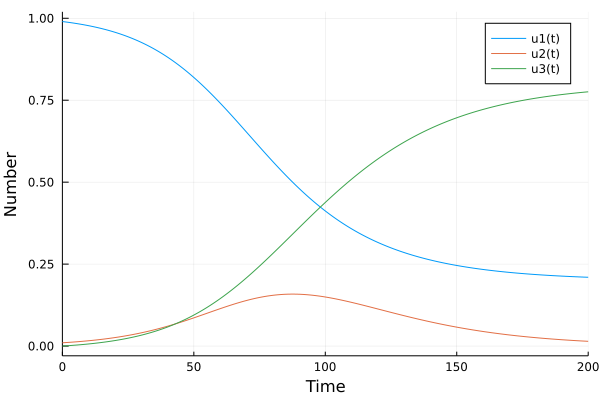

In [11]:
plot(sir_sol,xlabel="Time",ylabel="Number")

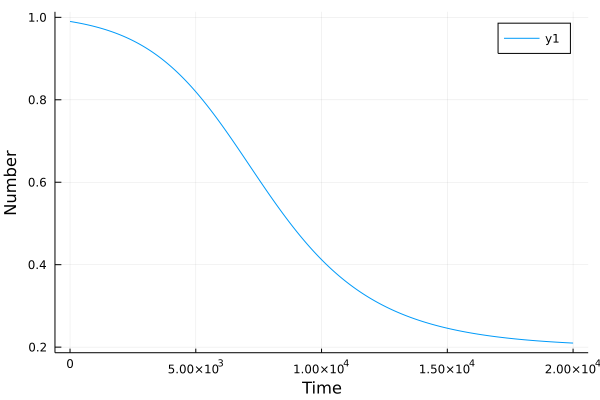

In [12]:
plot(Saint,xlabel="Time",ylabel="Number")

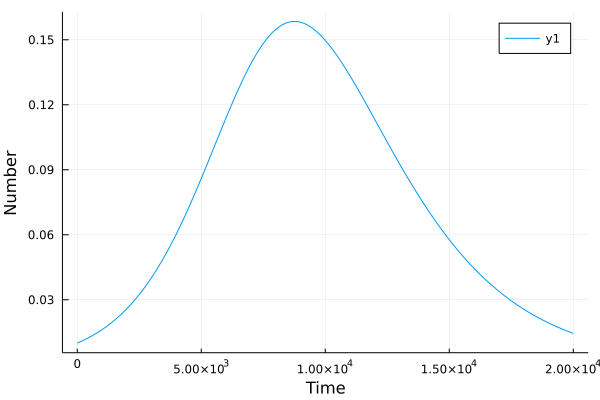

In [13]:
plot(Infe,xlabel="Time",ylabel="Number")

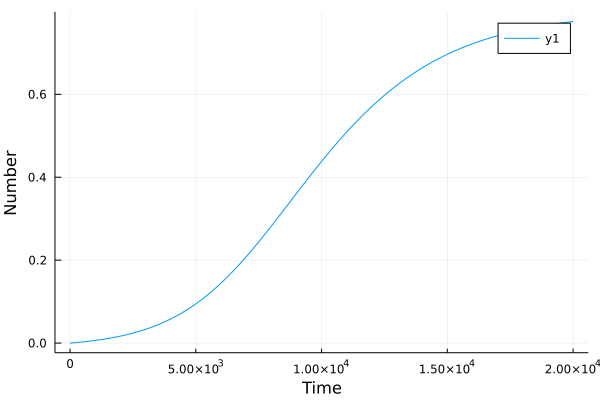

In [14]:
plot(Rec,xlabel="Time",ylabel="Number")